# Práctica 6 - DLT con 50 puntos de correspondencia

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline
from functools import reduce

In [2]:
def printVars(results):
    for key in results.keys():
        print(key)
        print(results[key])
        print(" ")

In [3]:
def aplicarHsobrePunto(Hparam, x,y,z=1):
    punto = np.array([x,y,z])
    punto = Hparam @ punto # aplicamos H
    punto = punto/punto[2] # normalizamos
    return (int(punto[0]),int(punto[1]))

In [4]:
def aplicarH(H, img):
    imgTransformada = np.zeros(img.shape)

    for i in range(img.shape[1]):
        for j in range(img.shape[0]):
            punto = np.array([i,j,1])
            punto = H @ punto
            punto = punto/punto[2]
            puntoX = int(punto[0])
            puntoY = int(punto[1])

            
            if (puntoY < img.shape[0] and  puntoY>= 0) and (puntoX< img.shape[1] and puntoX>= 0):
                imgTransformada[j, i, :] = img[puntoY,puntoX,:].astype(np.uint8)


    return imgTransformada

Para obtener el H:
* Generar una matriz A, de dimensión 2n × 9, con las matrices Ai
* Descomponer A según SVD. A = UD(V^t)


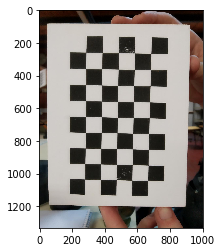

In [5]:
d1 = imread("img/dameros/damero1.png");
d2 = imread("img/dameros/damero2.png");

#d1 = imread("img/cuadrado1.png");
plt.imshow(d1);

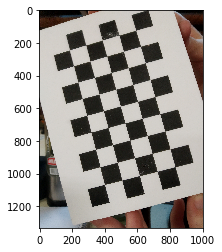

In [6]:
plt.imshow(d2);

In [7]:
#u,d,vt = np.linalg.svd(d1, full_matrices=True)
"Con esta descomposición tenemos que la última columna de la matriz V corresponde al vector de menor valor singular de la matriz A."
"O sea que la última fila de V corresponde al vector de menor valor singular de A"


'O sea que la última fila de V corresponde al vector de menor valor singular de A'

1. Tenemos mis correspondencias en el espacio pixel R2
2. Buscamos promedio y desvío estandard de ambos conjuntos de puntos de correspondencias.
3. Los normalizamos. O sea, les restamos el promedio y dividimos por sqrt(2)/desvio. Esto es equivalente a armar la H que transforma al espacio normal. Esta H es de 3x3, que escala y traslada.
H = [[s 0 -Mediax.s] [0 s -Mediay.s] [0 0 1]]
Obs: va a haber una H por conjunto de puntos. A la primera H la llamamos H norm, a la segunda H norm prima.
4. Pasamos todos los puntos a P2
5. Armamos las Ai, con eso armamos la A, y con eso obtenemos V. Con V obtenemos la H con puntito arriba, y con eso obtenemos la H final

In [8]:
def invertirCoordenadas(conjuntoPuntos):
    return [(p[1],p[0]) for p in conjuntoPuntos]

Como todavía no aprendimos a detectar features y sus correspondencias con SIFT o SURF, marcamos las 50 correspondencias manualmente

In [9]:
    puntosDamero = [(289,259),(388,261),(487,262),(586,264),(685,266), \
                    (288,359),(387,361),(485,363),(583,365),(682,366), \
                    (288,458),(365,461),(483,463),(581,465),(680,466), \
                    (287,557),(385,559),(482,562),(579,563),(677,565), \
                    (286,654),(383,656),(480,658),(577,660),(674,662), \
                    (285,750),(382,752),(478,754),(575,755),(672,758), \
                    (284,846),(381,848),(477,849),(573,852),(670,854), \
                    (283,942),(379,943),(475,946),(571,948),(668,951), \
                    (282,1036),(377,1039),(473,1040),(569,1043),(665,1045), \
                    (281,1129),(377,1131),(471,1134),(568,1136),(662,1138)]


    puntosOtroDamero = [(188,246),(288,216),(388,186),(491,156),(593,126), \
                    (214,344),(314,314),(416,284),(518,254),(622,224), \
                    (240,444),(341,414),(443,385),(547,356),(651,325), \
                    (267,544),(369,516),(471,487),(575,458),(680,428), \
                    (293,647),(396,618),(499,590),(603,561),(709,532), \
                    (320,749),(423,721),(527,693),(633,665),(740,637), \
                    (347,854),(451,826),(556,798),(663,771),(770,742), \
                    (375,961),(480,933),(586,906),(693,879),(802,852), \
                    (402,1069),(509,1043),(615,1015),(724,989),(833,961), \
                    (430,1178),(538,1152),(644,1125),(754,1098),(862,1072)]

###### Redefinicion de puntos intercambiando coordenadas
puntosDamero = invertirCoordenadas(puntosDamero)
puntosOtroDamero = invertirCoordenadas(puntosOtroDamero)


In [10]:
puntos = puntosDamero
puntosX = [p[0] for p in puntos]
puntosY = [p[1] for p in puntos]

otrosPuntos = puntosOtroDamero
otrosPuntosX = [p[0] for p in otrosPuntos]
otrosPuntosY = [p[1] for p in otrosPuntos]

In [11]:
def marcar(pl, x, y):
    pl.plot(y,x,'bo', markersize=10)


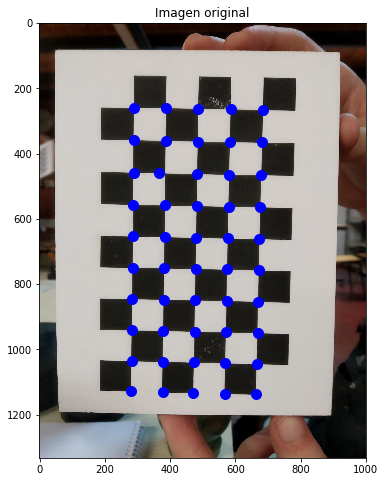

In [12]:
plt.figure(1, figsize=(8,8))
plt.plot()
plt.title("Imagen original")
plt.imshow(d1)

for elem in puntos:
    marcar(plt, elem[0], elem[1])

plt.show()

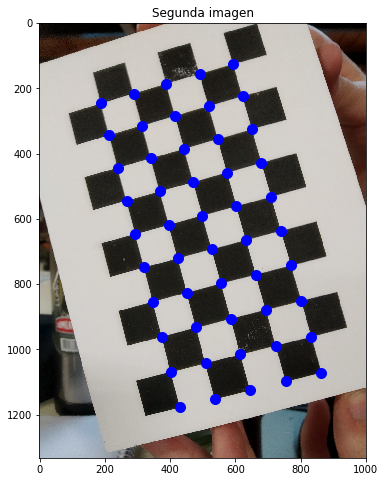

In [13]:
plt.figure(1, figsize=(8,8))
plt.plot()
plt.title("Segunda imagen")
plt.imshow(d2)

for elem in otrosPuntos:
    marcar(plt, elem[0], elem[1])

plt.show()

Buscamos el promedio y el desvío standard de ambos conjuntos de puntos de correspondencias

In [14]:
promedioPuntosX = np.mean(puntosX)
promedioPuntosY = np.mean(puntosY)

promedioOtrosPuntosX= np.mean(otrosPuntosX)
promedioOtrosPuntosY = np.mean(otrosPuntosY)

desvioPuntosX = np.std(puntosX)
desvioPuntosY = np.std(puntosY)

desvioOtrosPuntosX = np.std(otrosPuntosX)
desvioOtrosPuntosY = np.std(otrosPuntosY)

Los normalizamos. O sea, les restamos el promedio y multiplicamos por sqrt(2)/desvio. Esto es equivalente a armar la H que transforma al espacio normal. esta H es de 3x3, que escala y traslada. H = [[s 0 -Mediax.s] [0 s -Mediay.s] [0 0 1]] obs: va a haber una H por conjunto de puntos. A la primera H la llamamos H moño, a la segunda H moño prima.

In [15]:
puntosPromedio = np.mean(puntos, axis=0)
otrosPuntosPromedio = np.mean(otrosPuntos, axis=0)
puntosCentrados = puntos - np.tile(puntosPromedio, (len(puntos),1))
otrosPuntosCentrados = otrosPuntos - np.tile(otrosPuntosPromedio, (len(puntos),1))
normaPuntos = np.linalg.norm(puntosCentrados, axis=1)
normaOtrosPuntos = np.linalg.norm(otrosPuntosCentrados, axis=1)
dPuntos = np.mean(normaPuntos)
dOtrosPuntos = np.mean(normaPuntos)

sPuntos = np.sqrt(2)/dPuntos
sOtrosPuntos = np.sqrt(2)/dOtrosPuntos

Hnorm = np.array([[sPuntos,0      ,-np.mean(puntosX)*sPuntos],
                  [0      ,sPuntos,-np.mean(puntosY)*sPuntos],
                  [0      ,0      ,1]])

HnormPrima = np.array([[sOtrosPuntos,0      ,-np.mean(otrosPuntosX)*sOtrosPuntos],
                      [0      ,sOtrosPuntos,-np.mean(otrosPuntosY)*sOtrosPuntos],
                      [0      ,0      ,1]])


Pasamos los puntos a P2

In [16]:
puntosP2 = [(p[1],p[0],1)for p in zip(puntosX, puntosY)]
otrosPuntosP2 = [(p[1],p[0],1)for p in zip(otrosPuntosX, otrosPuntosY)]

print(puntosP2)

[(289, 259, 1), (388, 261, 1), (487, 262, 1), (586, 264, 1), (685, 266, 1), (288, 359, 1), (387, 361, 1), (485, 363, 1), (583, 365, 1), (682, 366, 1), (288, 458, 1), (365, 461, 1), (483, 463, 1), (581, 465, 1), (680, 466, 1), (287, 557, 1), (385, 559, 1), (482, 562, 1), (579, 563, 1), (677, 565, 1), (286, 654, 1), (383, 656, 1), (480, 658, 1), (577, 660, 1), (674, 662, 1), (285, 750, 1), (382, 752, 1), (478, 754, 1), (575, 755, 1), (672, 758, 1), (284, 846, 1), (381, 848, 1), (477, 849, 1), (573, 852, 1), (670, 854, 1), (283, 942, 1), (379, 943, 1), (475, 946, 1), (571, 948, 1), (668, 951, 1), (282, 1036, 1), (377, 1039, 1), (473, 1040, 1), (569, 1043, 1), (665, 1045, 1), (281, 1129, 1), (377, 1131, 1), (471, 1134, 1), (568, 1136, 1), (662, 1138, 1)]


Armamos las Ai, con eso armamos la A, y con eso obtenemos V. Con V obtenemos la H con puntito arriba, y con eso obtenemos la H final

In [17]:
def sumarMatriz(m1,m2): # a m1 le suma m2
    for i in range(len(m1)):
        for j in range(len(m1[0])):
            m1[i][j] = m1[i][j] + m2[i][j]        

In [18]:
def aplicarHsobrePuntoP2(H,p):
    vect = np.array([p[0],p[1],p[2]])
    res = H@vect
    x_pr = int(res[0])
    y_pr = int(res[1])
    z_pr = int(res[2])
    return(x_pr,y_pr,z_pr)

In [19]:
A = []

puntosP2Homologos = [Hnorm @ np.transpose(p) for p in puntosP2]
otrosPuntosP2Homologos = [(HnormPrima @ np.transpose(p)) for p in otrosPuntosP2]

printVars({"puntosP2Homologos": puntosP2Homologos,\
           "otrosPuntosP2Homologos": otrosPuntosP2Homologos})


for (x, xPrima) in zip(puntosP2Homologos, otrosPuntosP2Homologos):
    A.append([0,0,0,  -xPrima[2]*x[0], -xPrima[2]*x[1], -xPrima[2]*x[2],    xPrima[1]*x[0], xPrima[1]*x[1], xPrima[1]*x[2]])
    A.append([xPrima[2]*x[0], xPrima[2]*x[1], xPrima[2]*x[2],   0,0,0,  -xPrima[0]*x[0], -xPrima[0]*x[1], -xPrima[0]*x[2]])

puntosP2Homologos
[array([-2.05242818, -1.08995594,  1.        ]), array([-1.56172496, -1.08004275,  1.        ]), array([-1.07102174, -1.07508615,  1.        ]), array([-0.58031852, -1.06517295,  1.        ]), array([-0.0896153 , -1.05525976,  1.        ]), array([-2.05738478, -0.59429612,  1.        ]), array([-1.56668156, -0.58438293,  1.        ]), array([-1.08093493, -0.57446973,  1.        ]), array([-0.59518831, -0.56455653,  1.        ]), array([-0.10448509, -0.55959994,  1.        ]), array([-2.05738478, -0.1035929 ,  1.        ]), array([-1.67572672, -0.08872311,  1.        ]), array([-1.09084813, -0.07880991,  1.        ]), array([-0.60510151, -0.06889671,  1.        ]), array([-0.11439829, -0.06394012,  1.        ]), array([-2.06234138,  0.38711032,  1.        ]), array([-1.57659475,  0.39702352,  1.        ]), array([-1.09580473,  0.41189331,  1.        ]), array([-0.6150147 ,  0.41684991,  1.        ]), array([-0.12926808,  0.4267631 ,  1.        ]), array([-2.06729797,  

In [20]:
u,d,vt = np.linalg.svd(A)
"Con esta descomposición tenemos que la última columna de la matriz V corresponde al vector de menor valor singular de la matriz A. O sea que la última fila de V corresponde al vector de menor valor singular de A"

# chequeamos que SVD se haya hecho correctamente
#sigma = np.diag(d)
#sigma = np.transpose(np.vstack([sigma,[0,0,0,0,0,0,0,0]]))
#deberiaSerA = np.matmul(np.matmul(u,sigma), vt)

#for i in range(len(A)):
#    for j in range(len(A[0])):
#        if(abs(deberiaSerA[i][j] - A[i][j])>0.00001):
#            print(str(deberiaSerA[i][j]) + " deberia ser " + str(A[i][j]))
            

"ultima columna de la matriz V = ultima fila de la matriz Vt"
fila = vt[-1]

Hpuntito = [[fila[0],fila[1],fila[2]],[fila[3],fila[4],fila[5]],[fila[6],fila[7],fila[8]]]

Hpuntito corresponde a la H con puntito arriba descripta en las diapositivas. Para obtener la H final debemos considerar la normalización que calculamos previamente

In [21]:
HnormPrimaInv = np.linalg.inv(HnormPrima)
Hfinal = np.dot(HnormPrimaInv, np.dot(Hpuntito, Hnorm))
Hfinal = Hfinal/Hfinal[2,2]


In [22]:
printVars({"Hfinal": Hfinal, "Hpuntito": Hpuntito, "Hnorm": Hnorm, "HnormPrima":HnormPrima})

Hnorm
[[ 0.0049566   0.         -3.48488506]
 [ 0.          0.0049566  -2.37371488]
 [ 0.          0.          1.        ]]
 
HnormPrima
[[ 0.0049566   0.         -3.20632424]
 [ 0.          0.0049566  -2.55691074]
 [ 0.          0.          1.        ]]
 
Hfinal
[[ 9.49859183e-01  2.30222342e-01 -1.51320932e+02]
 [-3.12325235e-01  9.08647689e-01  9.01160955e+01]
 [-4.09056619e-05 -1.02391935e-04  1.00000000e+00]]
 
Hpuntito
[[-0.5121445221278188, -0.1555116330737784, -0.07853196071434315], [0.15276605609145838, -0.5043533276440995, 0.442142336134834], [0.004329123252500816, 0.010836331331707277, -0.4837572653640517]]
 


In [23]:
dResultado = aplicarH(np.linalg.inv(Hfinal), d1)

## Resultado

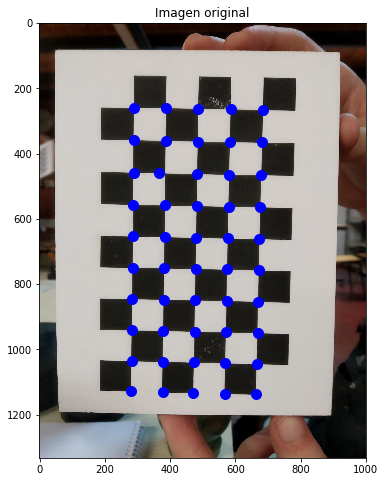

In [24]:
plt.figure(1, figsize=(8,8))
plt.plot()
plt.title("Imagen original")
plt.imshow(d1.astype(np.uint8));

for elem in puntos:
    marcar(plt, elem[0], elem[1])

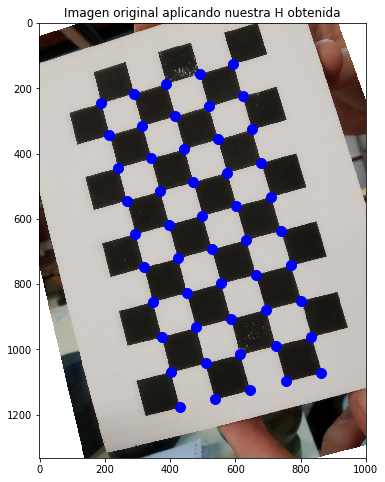

In [25]:
plt.figure(1, figsize=(8,8))
plt.plot()
plt.title("Imagen original aplicando nuestra H obtenida")
plt.imshow(dResultado.astype(np.uint8));

for elem in otrosPuntos:
    marcar(plt, elem[0], elem[1])

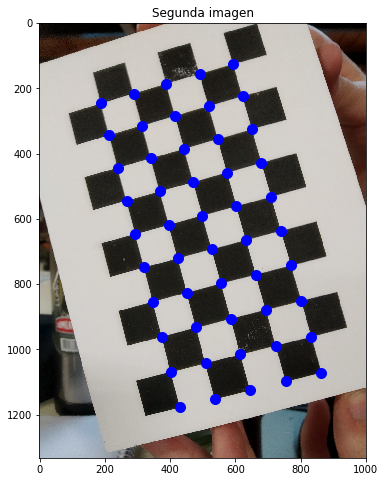

In [26]:
plt.figure(1, figsize=(8,8))
plt.plot()
plt.title("Segunda imagen")
plt.imshow(d2);

for elem in otrosPuntos:
    marcar(plt, elem[0], elem[1])